In [23]:
import matplotlib.pyplot as plt

from alphazero import ChessBoard
from arena import *

In [24]:
r = [MaxSigmoidTerritory] * 3 + [MaxTerritory] + [MaxDictTerritory] * 2
p = [
    {"name": "Max 2x+2", "K": 2, "B": 2},
    {"name": "Max 2x+1", "K": 2, "B": 1},
    {"name": "Max 3x+1", "K": 3, "B": 1},
    {"name": "Max 0/0.5/1"},
    {"name": "Max 0.2/0.5/0.8/1", "D": {0: 0.2, -1: 0.5, -2: 0.8, -3: 1}},
    {"name": "Max 0.1/0.3/0.7/1", "D": {0: 0.1, -1: 0.3, -2: 0.7, -3: 1}},
]

arena = Arena(ChessBoard(), robots=r, param_list=p, N=480)
arena.match()

Playing: 100%|██████████████████████████████| 1440/1440 [17:58<00:00,  1.34it/s]


NAME                   ELO           WIN-DRAW-LOSE
Max 2x+2             951.7           120-216-144
Max 2x+1            1035.3           133-211-136
Max 3x+1            1032.0           171-207-102
Max 0/0.5/1          935.1           129-205-146
Max 0.2/0.5/0.8/1   1076.6           147-202-131
Max 0.1/0.3/0.7/1    969.3           122-195-163


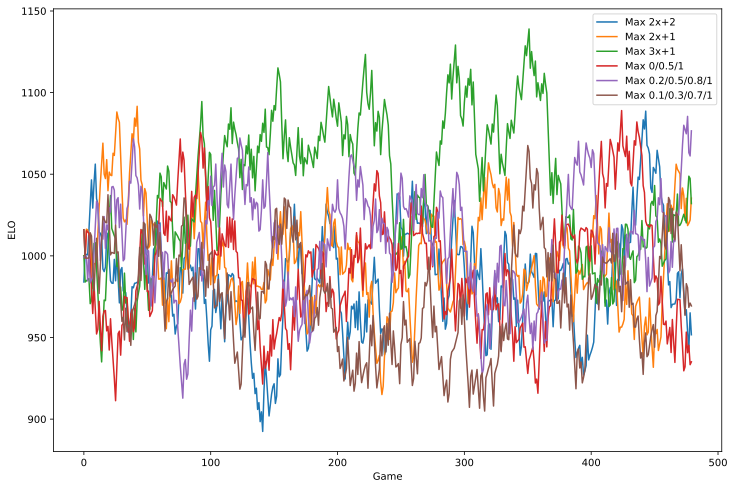

In [32]:
print("=" * 60)
print("NAME                   ELO           WIN-DRAW-LOSE")
print("=" * 60)

%config InlineBackend.figure_format='svg'#输出矢量图设置
plt.figure(figsize=(12, 8))

for robot in arena.robots:
    print(f"{robot.name:<20}{str(round(robot.elo, 1)):>6}           {robot.results.count(1)}-{robot.results.count(0.5)}-{robot.results.count(0)}")
    plt.plot(robot.elos, label=robot.name)
plt.legend()
plt.xlabel("Game")
plt.ylabel("ELO")
plt.show()